## Tutorial on Titanic Survival DS Using Regression

### Fatemeh
### f5tavako@uwaterloo.ca
### Islam
### immnasr@uwaterloo.ca


#### Importing Needed Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
%matplotlib inline 
plt.style.use('ggplot')

#### Loading titanic dataset from seaborn library

In [2]:
data = load_dataset("titanic")

#### Checking the columns in the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### Looking at the data itself
     Which values are numerical, categorical, text?
     Which numerical values are continous and which are discrete?

In [4]:
data
## Embark? Embark — Southampton, Cherbourg, and Queenstown
## sibsp sibling or spouse 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Values types?

Categorical &rarr; Survived, Sex, Embarked <br>
Ordinal &rarr; Pclass <br>
Numerical &rarr; <font color='red'>Age</font> , <font color='blue'>SibSp</font> , <font color='red'>Fare</font> , <font color='blue'>Parch</font> <br>
Numerical :: Continous or Discrete? <br>



#### Dropping categorical/nominal data to describe the numerical values of all other columns

In [5]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)

In [6]:
data_2.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f"Max value of age column : {data_2['age'].max()}")
print(f"Min value of age column : {data_2['age'].min()}")

Max value of age column : 80.0
Min value of age column : 0.42


#### Creating bins to distribute age as categorical values

In [8]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['age'] = pd.cut(data_2['age'], bins = bins, labels=labels)

In [9]:
pd.DataFrame(data_2['age'].value_counts())


,age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


#### Filling null ages with the mode of age category

In [10]:
data_2['age'].mode()[0]


'Adult'

In [11]:
data_4 = data_2.fillna({'age' : data_2['age'].mode()[0]})


#### Checking values of Embarked column, then filling values with S (Mode)

In [12]:
data_2['embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
print(f"How many 'S' on embarked column : {data_2[data_2['embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [14]:
data_3 = data_2.fillna({'embarked' : 'S'})


#### Checking relation between the passenger class and survival number

In [15]:
data_4[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by='survived')

,survived
pclass,
2,87
3,119
1,136


#### Checking relation between sex and survival

In [16]:
data_4[['sex', 'survived']].groupby(['sex']).sum().sort_values(by='survived')

,survived
sex,
male,109
female,233


#### Binning the fare into 4 categories

In [18]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_4['fare'] = pd.cut(data_4["fare"], bins = bins, labels = labels)

In [19]:
data_4.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,Young,1,0,low,S,Third
1,1,1,female,Adult,1,0,high,C,First
2,1,3,female,Adult,0,0,medium-low,S,Third
3,1,1,female,Adult,1,0,high,S,First
4,0,3,male,Adult,0,0,medium-low,S,Third


#### Dropping the class as it is the same as pclass which is numerical attribute 

C:\Users\Islam\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='survived', ylabel='Density'>

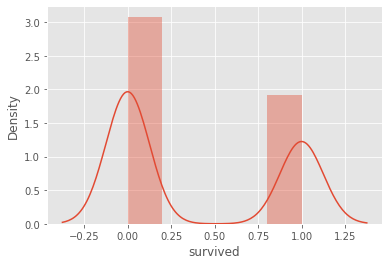

In [20]:
data_5 = data_4.drop('class', axis=1)
sns.distplot(data_5['survived'])

#### Plotting columns with survival to have good view on the data

<AxesSubplot:xlabel='embarked', ylabel='survived'>

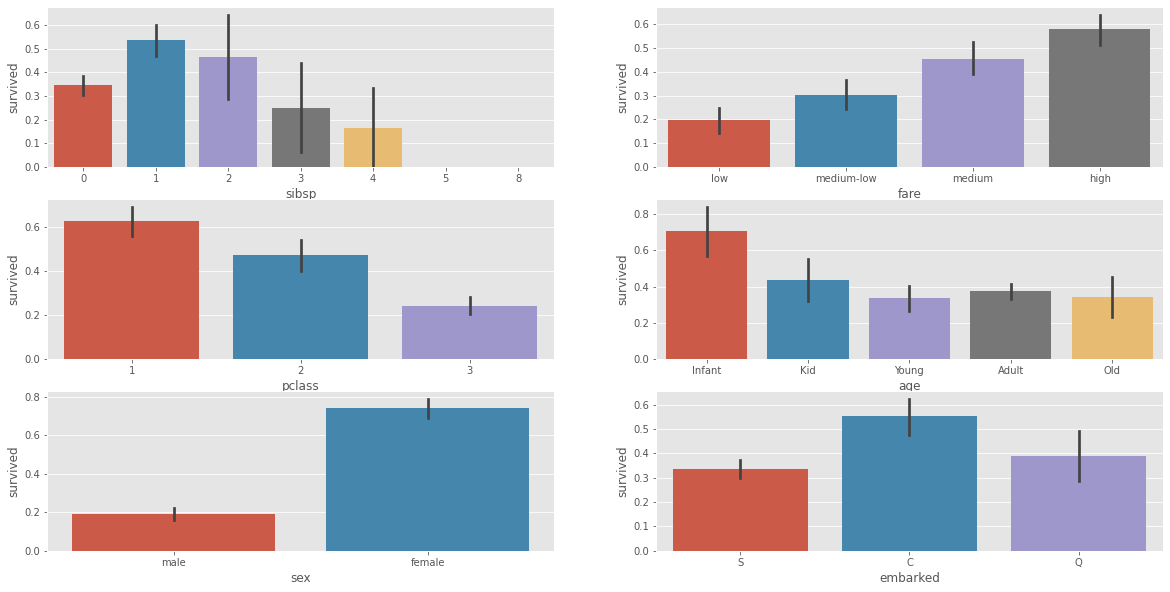

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data_5)
plt.subplot(322)
sns.barplot(x = 'fare', y = 'survived', data = data_5)
plt.subplot(323)
sns.barplot(x = 'pclass', y = 'survived', data = data_5)
plt.subplot(324)
sns.barplot(x = 'age', y = 'survived', data = data_5)
plt.subplot(325)
sns.barplot(x = 'sex', y = 'survived', data = data_5)
plt.subplot(326)
sns.barplot(x = 'embarked', y = 'survived', data = data_5)

#### get_dummies changes will change data from categorical into indicator (boolean) values, 1 if the category is valid and 0 otherwise. Each category will have a unique column as ML models does not work with non-numerical values.

In [23]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummy_data = pd.get_dummies(data_5[dummies])

In [24]:
dummy_data.shape


(891, 14)

In [25]:
data_6 = pd.concat([data_5, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)

#### Importing needed libaries and methods for the regression model.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

#### Distributing the data into Train, test data and removing the survived column as it is our target to predict.

In [27]:
X = data_6.drop('survived', axis = 1)
y = data_6['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


#### Having a look on our data.

In [28]:
X_train.head(5)

,pclass,sibsp,parch,fare_low,fare_medium-low,fare_medium,fare_high,age_Infant,age_Kid,age_Young,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
242,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
344,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
170,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
187,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
800,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1


#### Creating a simple logistic regression model and fitting the train data, then prediction the test data and printing predictions.

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

#### To evaluate model performance the predicted values are compared with the actual survival values using the accuracy and creating a confusion matrix.

In [32]:
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))


0.8067796610169492
[[158  31]
 [ 26  80]]


In [35]:
clf =  SVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
print(accuracy_score(y_pred2, y_test))
print(confusion_matrix(y_pred2, y_test))


0.8033898305084746
[[161  35]
 [ 23  76]]


### Acknowledgement
<A Href="https://medium.com/analytics-vidhya/your-guide-for-logistic-regression-with-titanic-dataset-784943523994">This notebook is a part of Your Guide for logistic Regression with Titanic Dataset</A> 